# Coin Detection
**Name:** Sasinthar P    **Reg. No:** 212223232199 **Slot** 4E6-1

# **Coin Detection using Morphological Operations and Thresholding**

## **Aim**
In this project, you will work with an image and apply morphological operations and thresholding techniques to detect and count the total number of coins present in the image.

---
**Note:**
   - **Do not remove intermediate images.**
   - Display all key intermediate images (grayscale, thresholded, binary, morphological result, final detections).
   - Document your findings and observations for each step.
   - Print the total number of coins detected using both **blob detection** and **contour detection** methods.

---

## **Expected Output**
All expected output images and results are already displayed.  
Enter your code only inside the blocks marked as:

```python
### Your Code Here ###


In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

## <font style = "color:rgb(50,120,229)"> Step 1: Read Image</font>

In [2]:
# Read image
image=cv2.imread('CoinsA.png')

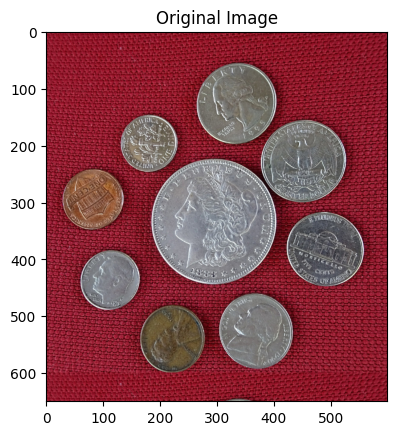

In [3]:
imageCopy = image.copy()
plt.imshow(image[:,:,::-1]);
plt.title("Original Image")
plt.show()

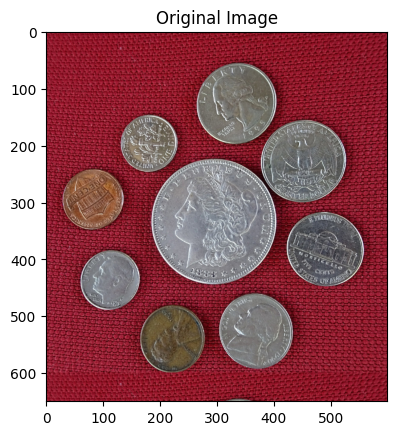

In [4]:
# Dont Change the Code 
imageCopy = image.copy()
plt.imshow(image[:,:,::-1]);
plt.title("Original Image")
plt.show()
# Expected output

## <font style = "color:rgb(50,120,229)">Step 2: Convert Image to Grayscale</font>

In [5]:
# Convert image to grayscale
imageGray=cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

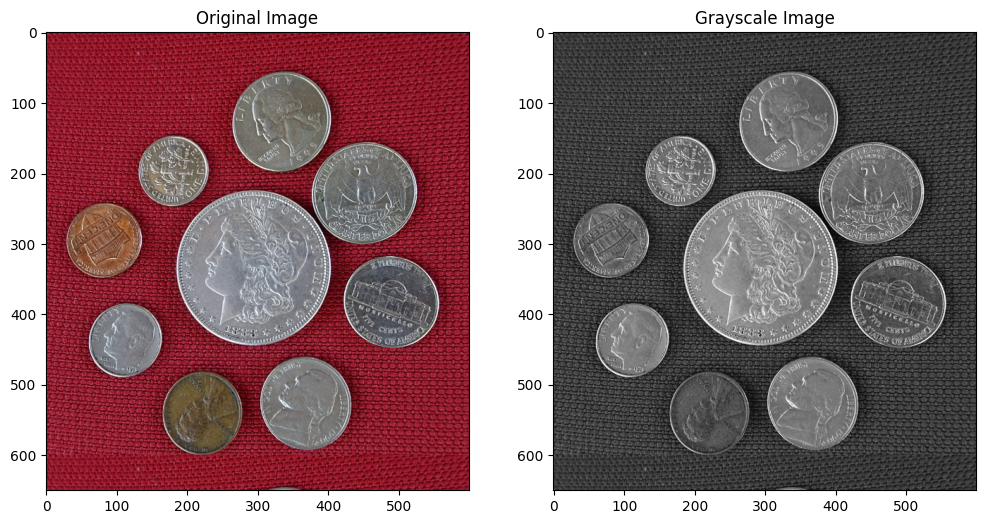

In [6]:
plt.figure(figsize=(12,12))
plt.subplot(121);plt.imshow(image[:,:,::-1]);plt.title("Original Image")
plt.subplot(122); plt.imshow(imageGray,cmap='gray');plt.title("Grayscale Image"); plt.show()
# Expected output

## <font style = "color:rgb(50,120,229)">Step 3: Split Image into R,G,B Channels</font>

In [7]:
# Split cell into channels
imageB,imageG,imageR=cv2.split(image)

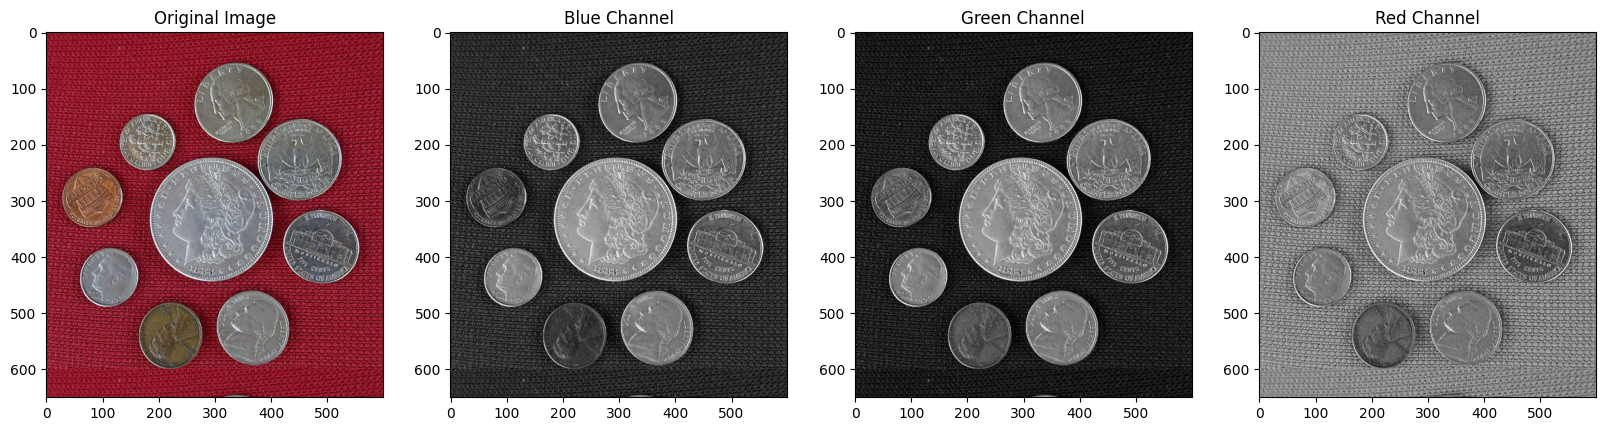

In [8]:
plt.figure(figsize=(20,12))
plt.subplot(141);plt.imshow(image[:,:,::-1]);plt.title("Original Image")
plt.subplot(142);plt.imshow(imageB,cmap='gray');plt.title("Blue Channel")
plt.subplot(143);plt.imshow(imageG,cmap='gray');plt.title("Green Channel")
plt.subplot(144);plt.imshow(imageR,cmap='gray');plt.title("Red Channel");
plt.show()
# Expected output

## <font style = "color:rgb(50,120,229)">Step 4: Perform Thresholding</font>

You will have to carry out this step with different threshold values to see which one suits you the most. Do not remove those intermediate images and make sure to document your findings.

In [9]:
th,dst_bin_inv=cv2.threshold(imageG,20,255,cv2.THRESH_BINARY_INV)

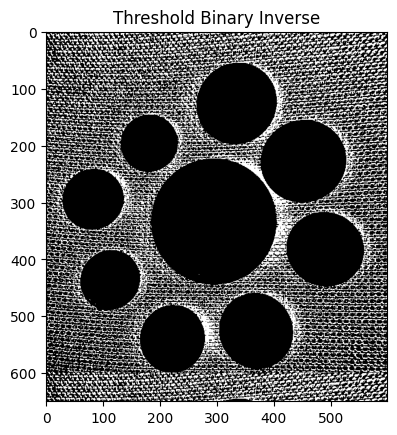

In [10]:
# Display the thresholded image
plt.imshow(dst_bin_inv,cmap='gray')
plt.title("Threshold Binary Inverse")
plt.show()

## <font style = "color:rgb(50,120,229)">Step 5: Perform morphological operations</font>

You will have to carry out this step with different kernel size, kernel shape and morphological operations to see which one (or more) suits you the most. Do not remove those intermediate images and make sure to document your findings.

In [11]:
kSize=(8,8)
kernel1=cv2.getStructuringElement(cv2.MORPH_ELLIPSE,kSize)

In [12]:
imageDilated2 = cv2.dilate(dst_bin_inv,kernel1,iterations=2)

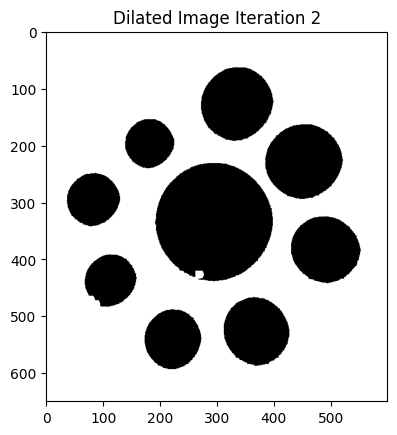

In [13]:
plt.imshow(imageDilated2,cmap='gray');plt.title('Dilated Image Iteration 2');plt.show()
# Expected output

In [14]:
# Display all the images
kSize=(11,11)
kernel1=cv2.getStructuringElement(cv2.MORPH_ELLIPSE,kSize)

In [15]:
# Get structuring element/kernel which will be used for dilation
imageEroded = cv2.erode(imageDilated2,kernel1)

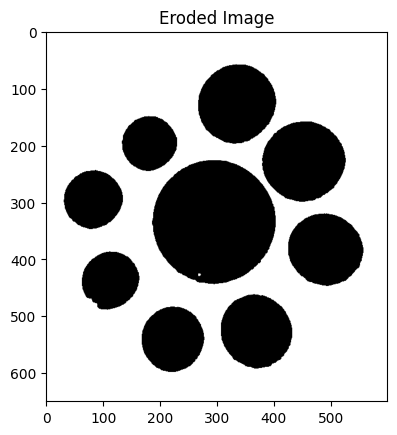

In [16]:
plt.imshow(imageEroded,cmap='gray');plt.title("Eroded Image");plt.show()
# Expected output

## <font style = "color:rgb(50,120,229)">Step 5: Create SimpleBlobDetector</font>

In [17]:
# Set up the SimpleBlobdetector with default parameters.
params = cv2.SimpleBlobDetector_Params()

params.blobColor = 0

params.minDistBetweenBlobs = 2

# Filter by Area.
params.filterByArea = False

# Filter by Circularity
params.filterByCircularity = True
params.minCircularity = 0.8

# Filter by Convexity
params.filterByConvexity = True
params.minConvexity = 0.8

# Filter by Inertia
params.filterByInertia =True
params.minInertiaRatio = 0.8

In [18]:
# Create SimpleBlobDetector
detector = cv2.SimpleBlobDetector_create(params)

## <font style = "color:rgb(50,120,229)">Step 6: Detect Coins</font>

### <font style = "color:rgb(8,133,37)">Hints</font>
Use **`detector.detect(image)`** to detect the blobs (coins). The output of the function is a list of **keypoints** where each keypoint is unique for each blob.

Print the number of coins detected as well.

In [19]:
# Detect blobs
keypoints = detector.detect(imageEroded)

In [20]:
# Print number of coins detected
print(f"Number of coins detected: {len(keypoints)}")

for k in keypoints:
    x,y=k.pt
    x=int(round(x))
    y=int(round(y))
    cv2.circle(image, (x,y),5,(255,0,0),-1)
    diameter=k.size
    radius=int(round(diameter/2))
    cv2.circle(image, (x,y), radius, (0,255,0),2)

Number of coins detected: 9


In [21]:
print(f"Number of coins detected: {len(keypoints)}")
# Expected output

Number of coins detected: 9
